### Naive Bayes Classifier Task
### 문장에서 느껴지는 감정 예측
##### 다중 분류(Multiclass Classification)
- 비대면 심리 상담사로서 메세지를 전달한 환자에 대한 감정 데이터를 수집했다.
- 각 메세지 별로 감정이 표시되어 있다.
- 미래에 동일한 메세지를 보내는 환자에게 어떤 심리 치료가 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### 🚩제시된 feature의 target을 예측해보자!
- 'Sweat deer'  
- 'The moment I saw her, I realized something was wrong.'

In [21]:
import pandas as pd

feeling_df = pd.read_csv('./datasets/feeling.csv', sep=";")
feeling_df

message  feeling
0      im feeling quite sad and sorry for myself but ...  sadness
1      i feel like i am still looking at a blank canv...  sadness
2                         i feel like a faithful servant     love
3                      i am just feeling cranky and blue    anger
4      i can have for a treat or if i am feeling festive      joy
...                                                  ...      ...
17995  i just had a very brief time in the beanbag an...  sadness
17996  i am now turning and i feel pathetic that i am...  sadness
17997                     i feel strong and good overall      joy
17998  i feel like this was such a rude comment and i...    anger
17999  i know a lot but i feel so stupid because i ca...  sadness

[18000 rows x 2 columns]

##### 레이블 인코딩

In [22]:
from sklearn.preprocessing import LabelEncoder

feeling_encoder = LabelEncoder()
feeling_df['target'] = feeling_encoder.fit_transform(feeling_df.feeling)

In [23]:
print(feeling_encoder.classes_)
feeling_df

['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


message  feeling  target
0      im feeling quite sad and sorry for myself but ...  sadness       4
1      i feel like i am still looking at a blank canv...  sadness       4
2                         i feel like a faithful servant     love       3
3                      i am just feeling cranky and blue    anger       0
4      i can have for a treat or if i am feeling festive      joy       2
...                                                  ...      ...     ...
17995  i just had a very brief time in the beanbag an...  sadness       4
17996  i am now turning and i feel pathetic that i am...  sadness       4
17997                     i feel strong and good overall      joy       2
17998  i feel like this was such a rude comment and i...    anger       0
17999  i know a lot but i feel so stupid because i ca...  sadness       4

[18000 rows x 3 columns]

##### 타겟 데이터 불균형 해소

In [24]:
feeling_df.target.value_counts()

# ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']
anger = feeling_df[feeling_df.target == 0].sample(653)
fear = feeling_df[feeling_df.target == 1].sample(653)
joy = feeling_df[feeling_df.target == 2].sample(653)
love = feeling_df[feeling_df.target == 3].sample(653)
sadness = feeling_df[feeling_df.target == 4].sample(653)
surprise = feeling_df[feeling_df.target == 5]

feeling_df = pd.concat([anger, fear, joy, love, sadness, surprise])

In [25]:
feeling_df.target.value_counts()

target
0    653
1    653
2    653
3    653
4    653
5    653
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

features, targets = feeling_df.message, feeling_df.target

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

naive_bayes_pipeline = Pipeline([('count_vectorizer', CountVectorizer()), ('multinomialNB', MultinomialNB())])
naive_bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [30]:
prediction = naive_bayes_pipeline.predict(X_test)
prediction

array([4, 2, 1, 5, 5, 0, 3, 3, 1, 1, 5, 3, 2, 2, 1, 2, 0, 4, 0, 5, 1, 3,
       0, 4, 3, 0, 5, 0, 3, 4, 5, 3, 3, 4, 1, 1, 0, 5, 5, 2, 5, 3, 2, 0,
       3, 5, 3, 1, 5, 5, 2, 0, 0, 3, 0, 5, 4, 1, 3, 1, 0, 0, 1, 2, 3, 1,
       1, 5, 3, 3, 5, 4, 0, 5, 1, 4, 1, 0, 2, 2, 1, 2, 5, 0, 3, 4, 5, 5,
       1, 5, 5, 1, 2, 1, 1, 1, 4, 1, 5, 3, 5, 2, 4, 3, 1, 4, 0, 3, 4, 1,
       1, 3, 2, 5, 5, 3, 3, 3, 5, 2, 3, 1, 1, 2, 0, 0, 3, 3, 5, 3, 5, 5,
       3, 4, 3, 1, 0, 1, 0, 1, 3, 0, 2, 3, 3, 3, 5, 4, 4, 3, 3, 2, 1, 2,
       0, 4, 2, 2, 5, 2, 2, 0, 4, 5, 1, 1, 0, 3, 3, 2, 5, 2, 5, 3, 3, 0,
       5, 0, 5, 4, 5, 3, 2, 0, 4, 1, 2, 3, 3, 3, 0, 5, 4, 5, 5, 5, 2, 1,
       2, 5, 5, 4, 0, 1, 2, 3, 2, 5, 1, 3, 4, 0, 4, 5, 0, 1, 5, 0, 2, 2,
       0, 3, 5, 3, 5, 1, 5, 2, 3, 5, 5, 0, 3, 3, 1, 2, 1, 3, 3, 5, 5, 1,
       1, 4, 4, 4, 5, 5, 5, 2, 3, 2, 1, 3, 1, 2, 1, 0, 4, 1, 5, 5, 2, 4,
       3, 4, 0, 3, 2, 3, 4, 0, 3, 3, 1, 1, 5, 2, 5, 2, 3, 4, 2, 3, 3, 5,
       1, 1, 0, 3, 4, 5, 4, 2, 3, 5, 5, 3, 0, 4, 5,

In [31]:
naive_bayes_pipeline.score(X_test, y_test)

0.7155612244897959

In [36]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
#     ROC-AUC : 연구 대상
#     roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy , precision ,recall, f1))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[ 90   9   5  12  10   5]
 [ 10  89   6   8   7  11]
 [  5  15  74  19   9   8]
 [  1   3  11 111   2   3]
 [ 13  11   7   5  85   9]
 [  4   7   5   3   0 112]]
정확도: 0.7156, 정밀도: 0.7154, 재현율: 0.7153, F1:0.7121
###########################################################################


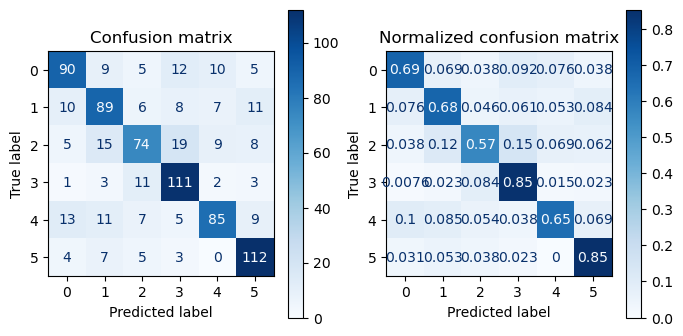

In [37]:
get_evaluation(y_test, prediction, naive_bayes_pipeline, X_test)